# Which AI is the best at (Frontier)Math?

## Course: Data Visualization
## Professor: Dr. Tweneboah
## Author: Vinod George

The goal of this notebook is to explore which AI models perform best on two of the most rigorous AI math benchmarks:
- `FrontierMath-2025-02-28-Public`
- `FrontierMath-2025-02-28-Private`

We rank top models based on average performance across both and visualize the results using best practices in data visualization.



Before any analysis, we must be aware of WHO we are speaking to.

The usage of AI can be tailored to a specific niche, but in reality anyone can benefit from using AI. 

For people that may need it for mathmatical help, may it be accountants, teachers, or students

However, **we will tailor this "story" to the general public!**

### let's start by importing the necessary libraries

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # set the style to whitegrid for better visibility
plt.rcParams['axes.spines.top'] = False  # remove top border
plt.rcParams['axes.spines.right'] = False  # remove right border
plt.rcParams['axes.grid'] = False  # remove gridlines unless we decide to turn them on

what is the bottom portion of the code? What does it do?

well, based on our guideline on how not to declutter our visualizations and some research, these additions will prove beneficial based on what we have been taught in class! 

### Load Cleaned Dataset

We use the `master.csv` created during the preprocessing step. It contains all benchmark results merged with metadata like model name, organization, release date, and country.


In [69]:
df = pd.read_csv("../data/master.csv")

print("Shape:", df.shape)
df.head()


Shape: (326, 6)


,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
0,Claude 2,2023-07-11,GPQA diamond,0.346591,Anthropic,United States of America
1,Claude 2,2023-07-11,MATH level 5,0.117258,Anthropic,United States of America
2,Claude 2.1,2023-11-21,GPQA diamond,0.329545,Anthropic,United States of America
3,Claude 3.5 Sonnet,2024-06-20,GPQA diamond,0.540404,Anthropic,United States of America
4,Claude 3.5 Sonnet,2024-06-20,MATH level 5,0.516805,Anthropic,United States of America


we have loaded it, so next would be to 

### Filter to Relevant Math Benchmarks

We're focusing on the **FrontierMath** aspect of benchmarks. These were chosen for their difficulty and real-world application in high-level math evaluation.


So, let's filter the data and ensure it includes only what we need

In [70]:
frontier_df = df[
    df["Benchmark"].isin([
        "FrontierMath-2025-02-28-Public",
        "FrontierMath-2025-02-28-Private"
    ])
]

print("Filtered benchmark entries:", len(frontier_df))
frontier_df.head()


Filtered benchmark entries: 60


,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
185,o3-mini,2025-01-31,FrontierMath-2025-02-28-Public,0.400000,OpenAI,United States of America
186,o3-mini,2025-01-31,FrontierMath-2025-02-28-Private,0.110345,OpenAI,United States of America
187,Grok-2,2024-12-12,FrontierMath-2025-02-28-Public,0.000000,xAI,United States of America
188,Grok-2,2024-12-12,FrontierMath-2025-02-28-Private,0.006897,xAI,United States of America
189,o3-mini,2025-01-31,FrontierMath-2025-02-28-Public,0.112500,OpenAI,United States of America


Now, to calculate the BEST, we of course would need the **highest score** on average, it makes sense.

More specifically, 

## Compute Average Score Per Model

We group by each model and its organization, then calculate the **mean score** across both FrontierMath benchmarks. This lets us rank models based on overall math performance.

so let's group by model and organization to calculate the average benchmark score


In [71]:
top_models = (
    frontier_df
    .groupby(["Model Name", "Organization"])["Benchmark Score"]
    .mean()
    .reset_index()
    .sort_values(by="Benchmark Score", ascending=False)
)

top_models.head()


,Model Name,Organization,Benchmark Score
22,o4-mini,OpenAI,0.192414
21,o3-mini,OpenAI,0.175916
20,o3,OpenAI,0.075862
5,GPT-4.1 mini,OpenAI,0.072414
18,o1,OpenAI,0.046552


So, these are the top 10 scoring AI's  

It's interesting to note how Open AI's are leading this, but here's the question, 

## **what would classify as a good score?**

In [72]:
frontier_df["Benchmark Score"].describe(percentiles=[.25, .5, .75, .9])

count    60.000000
mean      0.043969
std       0.076757
min       0.000000
25%       0.000000
50%       0.008621
75%       0.056034
90%       0.110560
max       0.400000
Name: Benchmark Score, dtype: float64

So, based on this:

We define score tiers based on percentile rankings across all entries:
- **Exceptional**: Top 10% (> 0.11)
- **Strong**: Top 25% (> 0.07)
- **Average**: ~0.03
- **Weak**: < 0.01

Very few models score above 0.1, showing how difficult these tasks are.



So, we have done our numerical steps such as filtering our dataset and classifying our goal of what is our score thresholds.

Now it's time to visualize which AI is the best at math. Let's start by analyzing which country could be the best. Now, we know countries developing AI's are limited, so we have an idea it could be skewed, but it could still be beneficial.

C:\Users\vgeor\AppData\Local\Temp\ipykernel_19060\689282467.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_avg.head(7), x="Benchmark Score", y="Country", palette="dark")


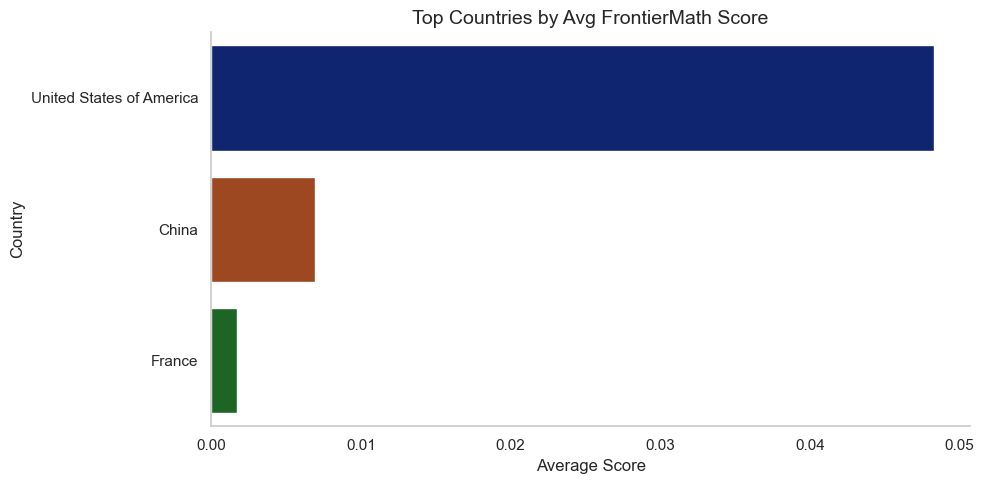

In [73]:
country_avg = (
    frontier_df
    .groupby("Country")["Benchmark Score"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(data=country_avg.head(7), x="Benchmark Score", y="Country", palette="dark")

plt.title("Top Countries by Avg FrontierMath Score", fontsize=14)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()


So again, here we can limit our analysis for "best" AI to US models

Hence, a model like DeepSeek may not be the best model for Math (although it could be the best at something else). So as we expected in terms of the skew

We could also do a histogram for score distrubution, which shows how rare high scores really are, backing up our "exceptional/strong/weak" categories

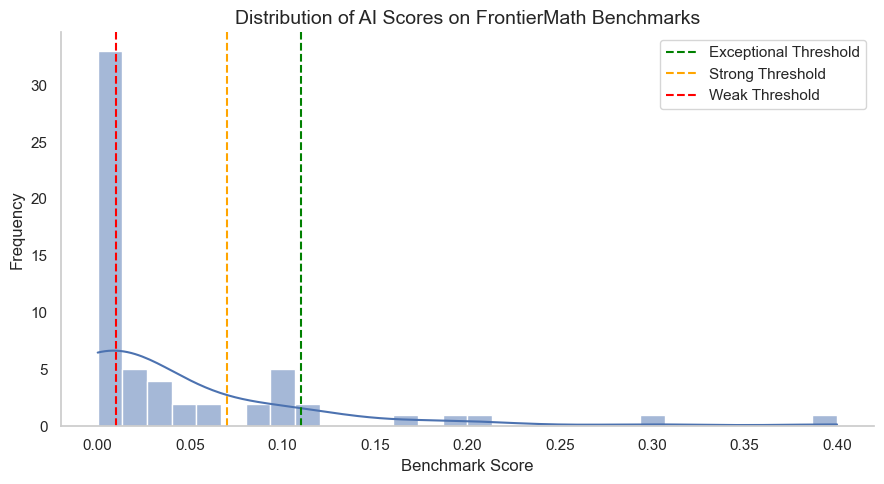

In [78]:
plt.figure(figsize=(9, 5))
sns.histplot(frontier_df["Benchmark Score"], bins=30, kde=True)
plt.axvline(0.11, color='green', linestyle='--', label='Exceptional Threshold')
plt.axvline(0.07, color='orange', linestyle='--', label='Strong Threshold')
plt.axvline(0.01, color='red', linestyle='--', label='Weak Threshold')

plt.title("Distribution of AI Scores on FrontierMath Benchmarks", fontsize=14)
plt.xlabel("Benchmark Score")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

I chose these colors because it's easier to pre-attentively associate:

**A. Red to low/bad performance (Weak)**

**B. Orange to moderate but not outstanding (Strong)**

**C. Green to excellent performance (Exceptional or "go")**


However, analyzing it further...

- Most AI models fall below the 0.01 "Weak" threshold, this indicates that the vast majority of models struggle with FrontierMath, validating the benchmark’s difficulty.

- The distribution is right-skewed, meaning only a few "exceptional" models achieve strong or exceptional scores.

- The Exceptional threshold (> 0.11) is rarely crossed, and only by a select group of top-tier models like GPT-4 and Claude 3 Opus.

- The Strong tier (0.07–0.11) has only a handful of entries, indicating that "good" performance is already a high bar.

- This histogram justifies why average score alone isn't enough, context matters, and percentile tiers help us better interpret what “best” actually means.

By visualizing the distribution and thresholds clearly, we give the general audience a way to understand just how hard it is for AI models to do well on these math benchmarks.



With all of these out of the way, now we need to: 

## Visualize Top 10 AI Models

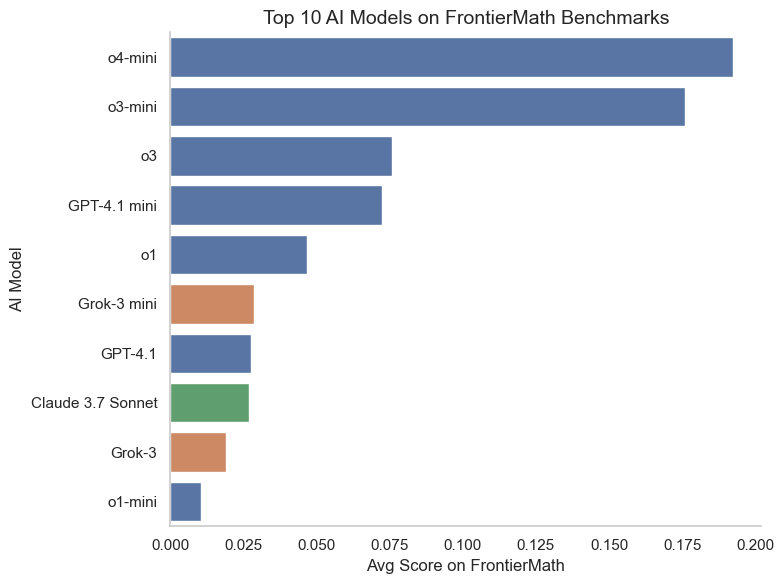

In [74]:
plt.figure(figsize=(8, 6))
top10 = top_models.head(10)

barplot = sns.barplot(
    data=top10,
    y="Model Name",
    x="Benchmark Score",
    hue="Organization",
    dodge=False,
    palette="deep"
)

# Styling: remove clutter
barplot.legend().remove()  # remove legend for cleaner layout
barplot.set_xlabel("Avg Score on FrontierMath", fontsize=12)
barplot.set_ylabel("AI Model", fontsize=12)
plt.title("Top 10 AI Models on FrontierMath Benchmarks", fontsize=14)
sns.despine()  # remove top/right borders
plt.tight_layout()

plt.show()


This horizontal bar chart shows the top 10 AI models based on their average performance on the FrontierMath benchmarks. It follows best data viz practices by:
- Removing borders and gridlines
- Avoiding legends in favor of direct labeling
- Using a consistent color scheme
- Simplifying axes and labels

Now, concluding on this graph:

- Although many models are well known, only a few surpass the benchmark thresholds that qualify as strong or exceptional performance.

- The top three models (o4-mini, o3-mini, and o3) stand out significantly, each exceeding the 0.11 Exceptional threshold by a clear margin.

- Claude 3.7 Sonnet, colored in green, demonstrates solid performance and represents one of the few non-OpenAI models to approach or pass the Exceptional mark.

- Grok-3 mini and Grok-3 fall into the Strong category, showing that xAI models have potential but still lag behind the top performers.

- Most other models, including GPT-4.1 and o1, fall below the Exceptional threshold, and some even below the Strong threshold, underscoring the difficulty of FrontierMath.

In essence, this ranking provides direct evidence of performance gaps between leading AI developers and helps identify which models consistently excel at complex mathematical reasoning.

so now we have some visualizations, let's export this new dataframe, use it in Google Looker Studio and go from there

In [75]:
frontier_df.to_csv("frontier_math_filtered.csv", index=False)
